# Lab 0: introduction into image filtering using PyTorch
This is a notebook, which could help you with testing first lab assignment.
It contains utility functions for visualization, some test input for the functions you needs to implement,
and the output of the reference solution for the same test input.

template functions for the assignment contain a short description of what the function is supposed to do,
and produce an incorrect output, which is nevertheless in proper format: type and shape.

You are not allowed to use kornia or opencv or any other library functions, which are specifically designed
to perform the operations requested in assignment

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import torch
import kornia


def plot_torch(x, y, *kwargs):
    plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy(), *kwargs)
    return

def imshow_torch(tensor, *kwargs):
    plt.figure()
    plt.imshow(kornia.tensor_to_image(tensor), *kwargs)
    return
inp = torch.linspace(-12, 12, 101)

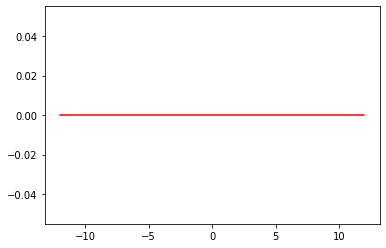

In [2]:
from imagefiltering import gaussian_deriv1d
plot_torch(inp, gaussian_deriv1d(inp, 3.0), 'r-')

## Reference example

```python
from lab0_reference.imagefiltering import gaussian_deriv1d
plot_torch(inp, gaussian_deriv1d(inp, 3.0), 'r-')
```

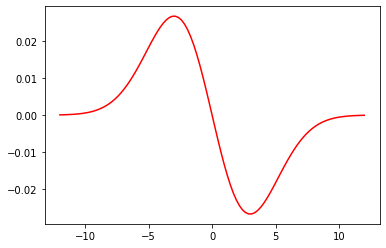

## Convolution vs correlation

Despite the name, pytorch `convolution` operator does in fact **correlation**. The correlation result is convolution, rotated by 180 degree.
To distingguish the difference, remember that **convolution copies the kernel for the impulse signal**. 



inp2 = tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]]), 

 kernel2=tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]),
 
 true conv output2=
 tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])
pytorch convolution aka correlation result =
 tensor([[[[0., 0., 0., 0., 0.],
          [0., 9., 8., 7., 0.],
          [0., 6., 5., 4., 0.],
          [0., 3., 2., 1., 0.],
          [0., 0., 0., 0., 0.]]]])


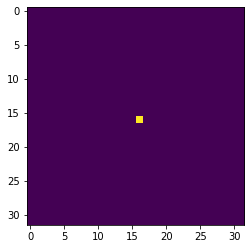

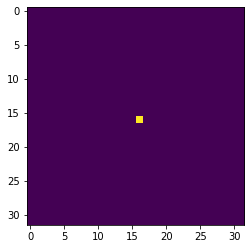

In [3]:
from imagefiltering import filter2d #, dgauss, gaussfilter, gaussderiv, gaussderiv2
from torch.nn.functional import conv2d
inp = torch.zeros((1,1,32,32))
inp[...,16,16] = 1.
imshow_torch(inp)

kernel = torch.ones(3,3)

out = filter2d(inp, kernel)
imshow_torch(out)

### Signal-copy illustration.
inp2 = torch.zeros((1,1,5,5))
inp2[...,2,2] = 1.
kernel2 = torch.arange(1,10).reshape(3,3).float()
out2 = filter2d(inp2, kernel2)

out2_corr = conv2d(inp2, kernel2[None, None], stride=1, padding=1)

print (f'inp2 = {inp2}, \n\n kernel2={kernel2},\n \n true conv output2=\n {out2}')
print (f'pytorch convolution aka correlation result =\n {out2_corr}')



## Reference example
```python
from imagefiltering import filter2d
inp = torch.zeros((1,1,32,32))
inp[...,16,16] = 1.
imshow_torch(inp)

kernel = torch.ones(3,3)

out = filter2d(inp, kernel)
imshow_torch(out)
```

    inp2 = tensor([[[[0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0.],
              [0., 0., 1., 0., 0.],
              [0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0.]]]]), 

     kernel2=tensor([[1., 2., 3.],
            [4., 5., 6.],
            [7., 8., 9.]]),

     true conv output2=
     tensor([[[[0., 0., 0., 0., 0.],
              [0., 1., 2., 3., 0.],
              [0., 4., 5., 6., 0.],
              [0., 7., 8., 9., 0.],
              [0., 0., 0., 0., 0.]]]])
    pytorch convolution aka correlation result =
     tensor([[[[0., 0., 0., 0., 0.],
              [0., 9., 8., 7., 0.],
              [0., 6., 5., 4., 0.],
              [0., 3., 2., 1., 0.],
              [0., 0., 0., 0., 0.]]]])
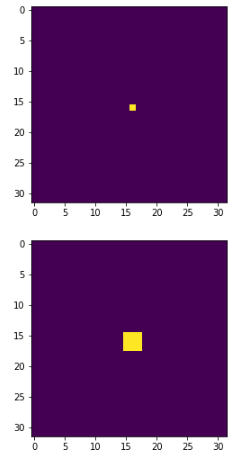

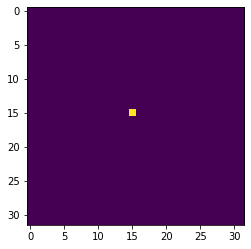

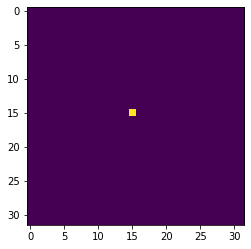

In [4]:
from imagefiltering import gaussian_filter2d
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = gaussian_filter2d(inp, sigma)
imshow_torch(out)


## Reference example

```python
from lab0_reference.imagefiltering import gaussian_filter2d
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = gaussian_filter2d(inp, sigma)
imshow_torch(out)
```
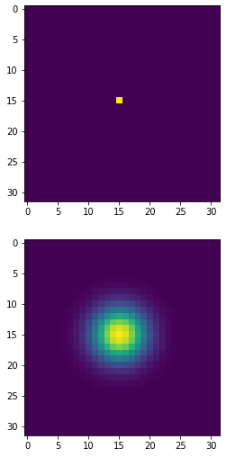

torch.Size([1, 1, 32, 32])


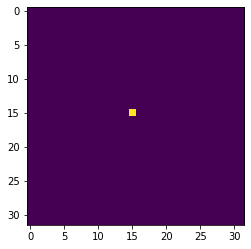

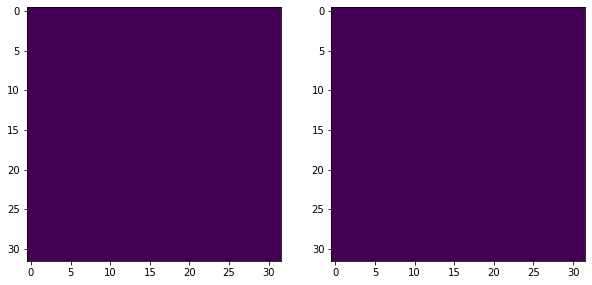

In [5]:
def imshow_torch_channels(tensor, dim = 1, *kwargs):
    num_ch = tensor.size(dim)
    fig=plt.figure(figsize=(num_ch*5,5))
    tensor_splitted = torch.split(tensor, 1, dim=dim)
    for i in range(num_ch):
        fig.add_subplot(1, num_ch, i+1)
        plt.imshow(kornia.tensor_to_image(tensor_splitted[i].squeeze(dim)), *kwargs)
    return

from imagefiltering import spatial_gradient_first_order
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out2 = spatial_gradient_first_order(inp, sigma)
print (out.shape)
imshow_torch_channels(out2, 2)


## Reference example


```python 
from lab0_reference.imagefiltering import spatial_gradient_first_order
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = spatial_gradient_first_order(inp, sigma)
print (out.shape)
imshow_torch_channels(out, 2)
```
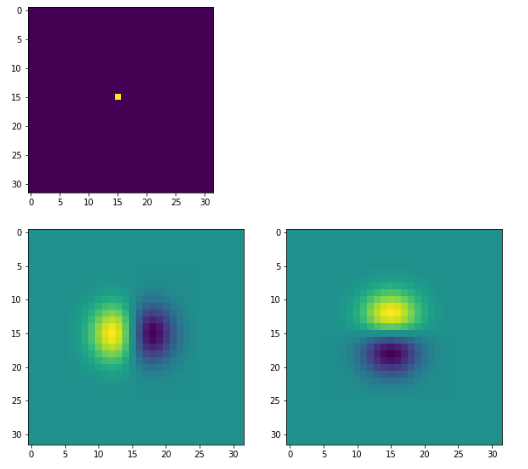

## Converting (center, unit_x, unit_y) into affine transform A
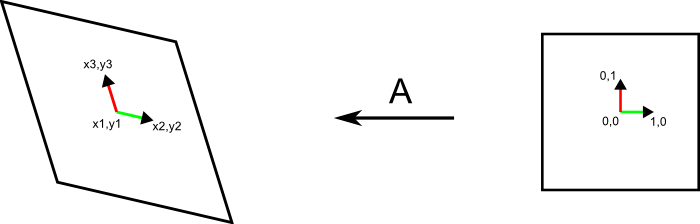

In [6]:
from imagefiltering import affine
inp = torch.tensor([[3, 3.]]), torch.tensor([[6, 3.]]), torch.tensor([[3, 6.]])
A = affine(*inp)
print (A)

tensor([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]])


## Reference example

```python 
from lab0_reference.imagefiltering import affine
inp = 3, 3, 6, 3, 3, 6
A = affine(*inp)
print (A)
```

    tensor([[3., 0., 3.],
            [0., 3., 3.],
            [0., 0., 1.]])

## Affine patch extraction
The y-axis here is flipped, so for the both image and patch we have it pointing down. 
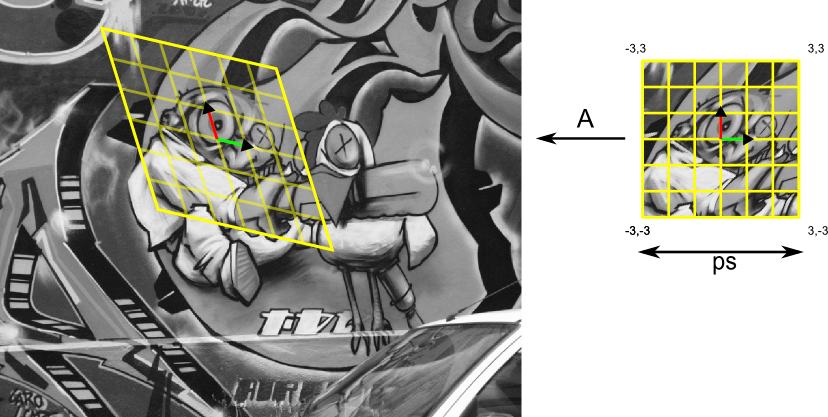

A = tensor([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]])
patches.shape = torch.Size([4, 3, 32, 32])


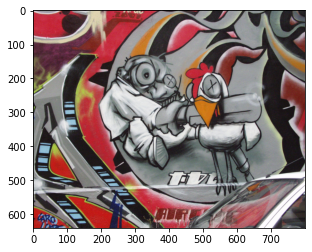

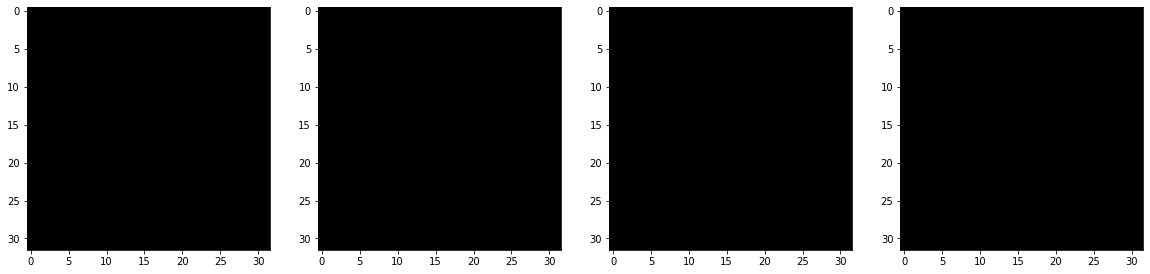

In [7]:
from imagefiltering import extract_affine_patches, extract_antializased_affine_patches, affine
import cv2


def load_torch_image_rgb(fname):
    img1 = cv2.imread(fname)
    timg1 = kornia.image_to_tensor(img1, False).float()
    timg1 = kornia.color.bgr_to_rgb(timg1) / 255.
    return timg1

timg1 = load_torch_image_rgb('graffiti.ppm')

imshow_torch(timg1)

patch_centers = torch.tensor([[300., 200.], [400., 300], [330, 200], [100,100]])
patch_unitx = torch.tensor([[350., 210.], [450., 300], [380, 200], [150,150]])
patch_unity = torch.tensor([[270., 150.], [400., 360], [330,250], [50, 150]])

A = affine(patch_centers, patch_unitx, patch_unity)
print (f'A = {A}')
patches = extract_antializased_affine_patches(timg1,
                                 A, 
                                 torch.zeros(A.size(0)).long().reshape(-1,1),
                                 32, 1.0)

print (f'patches.shape = {patches.shape}')
imshow_torch_channels(patches, 0)

## Reference example

```python
from imagefiltering import extract_affine_patches, extract_antializased_affine_patches, affine
import cv2


def load_torch_image_rgb(fname):
    img1 = cv2.imread(fname)
    timg1 = kornia.image_to_tensor(img1, False).float()
    timg1 = kornia.color.bgr_to_rgb(timg1) / 255.
    return timg1

timg1 = load_torch_image_rgb('graffiti.ppm')

imshow_torch(timg1)

patch_centers = torch.tensor([[300., 200.], [400., 300], [600,600], [100,100]])
patch_unitx = torch.tensor([[350., 210.], [450., 300], [650,600], [150,150]])
patch_unity = torch.tensor([[270., 150.], [400., 360], [600,650], [50, 150]])

A = affine(patch_centers, patch_unitx, patch_unity)
print (f'A = {A}')
patches = extract_antializased_affine_patches(timg1,
                                 A, 
                                 torch.zeros(A.size(0)).long().reshape(-1,1),
                                 32, 1.0)

print (f'patches.shape = {patches.shape}')
imshow_torch_channels(patches, 0)

```

    A = tensor([[[ 50., -30., 300.],
             [ 10., -50., 200.],
             [  0.,   0.,   1.]],

            [[ 50.,   0., 400.],
             [  0.,  60., 300.],
             [  0.,   0.,   1.]],

            [[ 50.,   0., 330.],
             [  0.,  50., 200.],
             [  0.,   0.,   1.]],

            [[ 50., -50., 100.],
             [ 50.,  50., 100.],
             [  0.,   0.,   1.]]])
    patches.shape = torch.Size([4, 3, 32, 32])
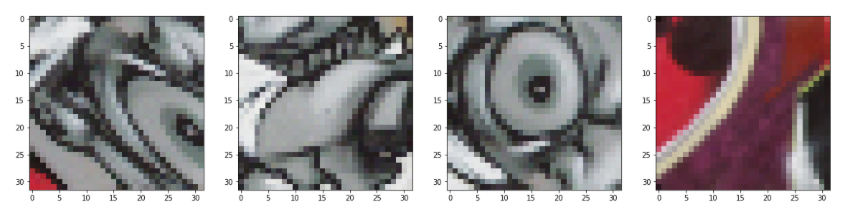